In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.manifold import TSNE


# Objectif du TP

Dans ce TP, nous allons travailler tout d'abord avec le dataset "digits.csv" qui contient des données sur des images représentant des chiffres manuscrits. 

Ces images sont décomposées en matrices de 8x8 pixels avec des valeurs allant de 0 à 16 correspondant à l'intensité de la couleur du pixel en noir et blanc (0 correspondant au noir et 16 correspondant au blanc). 

Le jeu comporte 1797 lignes et 65 colonnes, chaque ligne correspond à une image représentée par 64 valeurs représentant l'intensité des pixels et la dernière valeur donnant la classe affectée à l'image (de 0 à 9 correspondant au chiffre représenté). 
 
A partir de ces données d'entraînement, le but est de construire un modèle de prédiction qui permettra de déterminer un chiffre écrit à la main sur une feuille blanche.

Ce modèle de prédiction sera ici un modèle de classification n-aire, entraîné par apprentissage supervisé.

Une fois votre modèle validé, vous pourrez le tester dans un premier temps sur un jeu de test puis sur un exemple que vous réaliserez à la main vous-même à l'aide d'une feuille blanche (ou du tableau) et d'un appareil photo. On utilisera le programme chiffre.ipynb pour transformer votre photo en image pixelisée 8x8. 

Pour ce TP nous travaillerons avec une fraction du jeu de données comportant uniquement 539 lignes.


# Chargement des données d'entraînement

In [6]:
# 1) Chargez les données d'entraînement dans un objet Dataframe pandas (fonction pd.read_csv) et affichez les

train_data = pd.read_csv('digits.csv', header=None)
train_data.columns=["[0;0]","[0;1]","[0;2]","[0;3]","[0;4]","[0;5]","[0;6]","[0;7]",
                "[1;0]","[1;1]","[1;2]","[1;3]","[1;4]","[1;5]","[1;6]","[1;7]",
                "[2;0]","[2;1]","[2;2]","[2;3]","[2;4]","[2;5]","[2;6]","[2;7]",
                "[3;0]","[3;1]","[3;2]","[3;3]","[3;4]","[3;5]","[3;6]","[3;7]",
                "[4;0]","[4;1]","[4;2]","[4;3]","[4;4]","[4;5]","[4;6]","[4;7]",
                "[5;0]","[5;1]","[5;2]","[5;3]","[5;4]","[5;5]","[5;6]","[5;7]",
                "[6;0]","[6;1]","[6;2]","[6;3]","[6;4]","[6;5]","[6;6]","[6;7]",
                "[7;0]","[7;1]","[7;2]","[7;3]","[7;4]","[7;5]","[7;6]","[7;7]",
                "classe"]

train_data

,[0;0],[0;1],[0;2],[0;3],[0;4],[0;5],[0;6],[0;7],[1;0],[1;1],...,[6;7],[7;0],[7;1],[7;2],[7;3],[7;4],[7;5],[7;6],[7;7],classe
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [7]:
# 2) Affichez le descriptif des données (méthode describe).

# On doit voir apparaître un certain nombre de statistiques descriptives pour les différentes variables
# (moyenne, médiane, nombre de données manquantes, etc.)

train_data.describe()

,[0;0],[0;1],[0;2],[0;3],[0;4],[0;5],[0;6],[0;7],[1;0],[1;1],...,[6;7],[7;0],[7;1],[7;2],[7;3],[7;4],[7;5],[7;6],[7;7],classe
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


# Pré-traitement et visualisation

In [8]:
# 3) Affichez la liste des noms des caractéristiques 
# (sans la colonne "Outcome" qui correspond à la classe entre 0 et 9). 
# Assignez cette liste à une variable nommée 'features'.

features = train_data.columns[:-1]

features

Index(['[0;0]', '[0;1]', '[0;2]', '[0;3]', '[0;4]', '[0;5]', '[0;6]', '[0;7]',
       '[1;0]', '[1;1]', '[1;2]', '[1;3]', '[1;4]', '[1;5]', '[1;6]', '[1;7]',
       '[2;0]', '[2;1]', '[2;2]', '[2;3]', '[2;4]', '[2;5]', '[2;6]', '[2;7]',
       '[3;0]', '[3;1]', '[3;2]', '[3;3]', '[3;4]', '[3;5]', '[3;6]', '[3;7]',
       '[4;0]', '[4;1]', '[4;2]', '[4;3]', '[4;4]', '[4;5]', '[4;6]', '[4;7]',
       '[5;0]', '[5;1]', '[5;2]', '[5;3]', '[5;4]', '[5;5]', '[5;6]', '[5;7]',
       '[6;0]', '[6;1]', '[6;2]', '[6;3]', '[6;4]', '[6;5]', '[6;6]', '[6;7]',
       '[7;0]', '[7;1]', '[7;2]', '[7;3]', '[7;4]', '[7;5]', '[7;6]', '[7;7]'],
      dtype='object')

In [5]:
# En fonction des données utilisées il peut être utile de vérifier si des données sont absentes 
# et d'effectuer un traitement pour les remplacer par une valeur chiffrée

# Il peut être intéressant de faire une normalisation des données si celles-ci ne sont pas sur la 
# même échelle

# Dans notre cas toutes les données sont présentes et se trouve sur l'intervalle [0;16]
# il n'y a pas de traitement préalable à faire

## Visualisation avec TSNE

In [10]:
# 6) Lancer ce bloc de calcul qui permet d'appliquer la méthode TSNE. 

# La méthode TSNE permet de projeter les données dans un nouvel espace de dimension plus réduite (ici en dimension 2), 
# de telle sorte que les données proches dans l'espace d'origine aient une probabilité élevée d'être proche dans le nouvel espace. 
# Pour plus de détails sur cette méthode, voir https://dataanalyticspost.com/Lexique/t-sne/

tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(train_data[features].values)
print(X_embedded.shape)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
(1797, 2)


In [11]:
# 7) Lancer ce bloc de calcul qui permet de visualiser les données dans le nouvel espace de dimension 2.

# Les points sont colorés sur une échelle de couleurs allant de bleu pour le 0 à jaune pour le 9 
# en fonction de la classe attribuée à chaque matrice de pixels

# Qu'observez-vous au niveau de la répartition des points dans le nouvel espace ? 
# Que peut-on en déduire concernant les chances de succès d'une méthode de classification ?

px.scatter(X_embedded, x=0, y=1, color=train_data['classe'])

## Séparation des données

In [12]:
# On veut s'assurer que le modèle fonctionnera aussi pour de nouveaux chiffres. 
# On sépare donc les données en un jeu d'entraînement et un jeu de validation.

# 8) Séparer les données de manière à avoir 80 % des données dans l'ensemble d'entraînement 
# et 20 % pour l'ensemble de validation.
# On appelera respectivement ces ensembles digits_train et digits_valid.

digits_train=train_data.sample(frac=0.8,random_state=42) 
digits_valid=train_data.drop(digits_train.index)

digits_train


,[0;0],[0;1],[0;2],[0;3],[0;4],[0;5],[0;6],[0;7],[1;0],[1;1],...,[6;7],[7;0],[7;1],[7;2],[7;3],[7;4],[7;5],[7;6],[7;7],classe
1245,0,0,0,7,12,0,0,0,0,0,...,2,0,0,0,9,14,14,5,0,6
220,0,0,11,16,8,0,0,0,0,6,...,0,0,0,13,16,11,1,0,0,9
1518,0,0,8,15,12,4,0,0,0,5,...,0,0,0,13,16,15,8,0,0,3
438,0,0,2,12,12,12,9,2,0,0,...,0,0,0,3,15,3,0,0,0,7
1270,0,2,13,16,10,0,0,0,0,6,...,0,0,3,15,16,16,10,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,0,0,6,15,15,1,0,0,0,4,...,0,0,0,8,16,12,5,0,0,2
1463,0,0,3,12,8,1,0,0,0,0,...,0,0,0,3,11,15,7,0,0,0
1019,0,0,4,16,8,11,7,0,0,0,...,0,0,0,4,15,2,0,0,0,7
1498,0,1,9,15,13,4,0,0,0,5,...,0,0,0,8,15,16,9,1,0,3


In [13]:
# 9) Séparer pour chaque ensemble les features (matrice de pixels) et la cible à prédire ("outcome").
# On notera X_train, Y_train et X_valid, Y_valid respectivement 
# les features et les cibles pour l'ensemble d'entraînement et de validation.

X_train = digits_train[digits_train.columns[:-1]]
Y_train = digits_train[digits_train.columns[-1]]

X_valid = digits_valid[digits_train.columns[:-1]]
Y_valid = digits_valid[digits_train.columns[-1]]

print(X_train.shape, X_valid.shape)

(1438, 64) (359, 64)


# KPPV: K plus proches voisins

La méthode des K plus proches voisins est un algorithme d'apprentissage supervisé que l'on va utiliser pour classifier les différentes matrices de pixels du jeu de données digits. À partir d'un point x dont on ne connait pas la classe (Outcome), on cherche les k plus proches voisins de x dans le jeu d'entraînement selon la distance euclidienne. On récupère l'Outcome ayant le plus grand nombre d'occurrences parmi les k plus proches voisins. On considère que x appartient à la classe correspondant au plus grand taux d'occurrences.

https://fr.wikipedia.org/wiki/Méthode_des_k_plus_proches_voisins

https://scikit-learn.org/stable/modules/neighbors.html#classification

## Implémentation

In [14]:
# 11) Définissez une fonction euclidean_distance(v1, v2), calculant la distance euclidienne entre les vecteurs v1 et v2.

def euclidean_distance(v1,v2):

    distance = 0
    # Ecrire le calcul de la distance euclidienne entre les vecteurs v1 et v2

In [41]:
# 12) Tester la fonction euclidean_distance avec deux points du dataset d'entraînement de façon à vérifier si 
#     le calcul de distance fonctionne bien.

print("classe de la 1ère ligne : ", Y_train.iloc[0])
print("classe de la 2ème ligne : ", Y_train.iloc[1])
print("classe de la 26ème ligne : ", Y_train.iloc[25])

print("Distance entre la ligne 0 et la ligne 1 : ", euclidean_distance(X_train.iloc[0],X_train.iloc[1]))
print("Distance entre la ligne 0 et la ligne 25 : ", euclidean_distance(X_train.iloc[0],X_train.iloc[25]))


classe de la 1ère ligne :  6
classe de la 2ème ligne :  9
classe de la 26ème ligne :  6
Distance entre la ligne 0 et la ligne 1 :  55.235857918565905
Distance entre la ligne 0 et la ligne 25 :  39.28103868280471


In [42]:
# 13) Sélection des k plus proches voisins du point x_test 
# dans l'ensemble des points contenus dans X_train. 

def neighbors(X_train, y_label, x_test, k):
    
    list_distances =  []

    #Calculer la liste des distances par rapport à la donnée x_test
    # ...
    # ...

    df = pd.DataFrame()

    df["label"] = y_label
    df["distance"] = list_distances

    df = df.sort_values(by="distance")

    return df.iloc[:k,:]


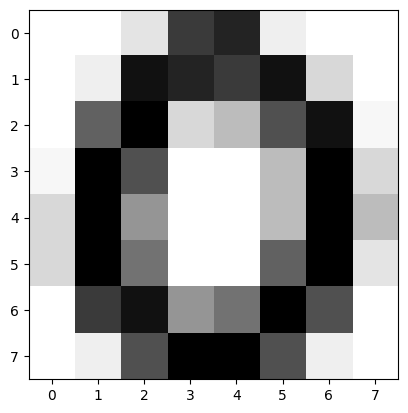

      label   distance
1740      9  23.494680
1146      9  25.980762
1132      9  26.305893
1686      9  26.324893
199       9  26.608269


In [52]:
# Ajout de nouveaux chiffres manuscrits ne provenant pas du jeu de données original pour tester l'efficacité

test0 = [0, 0, 3, 13, 14, 2, 0, 0, 0, 2, 15, 14, 13, 15, 4, 0, 0, 11, 16, 4, 6, 12, 15, 1, 1, 16, 12, 0, 0, 6, 16, 4, 4, 16, 8, 0, 0, 6, 16, 6, 4, 16, 10, 0, 0, 11, 16, 3, 0, 13, 15, 8, 10, 16, 12, 0, 0, 2, 12, 16, 16, 12, 2, 0]
test1 = [0, 0, 0, 0, 0, 11, 11, 0, 0, 0, 0, 0, 8, 16, 12, 0, 0, 1, 5, 12, 16, 16, 12, 0, 0, 8, 16, 15, 9, 16, 11, 0, 0, 0, 2, 1, 2, 16, 10, 0, 0, 0, 0, 0, 2, 16, 9, 0, 0, 0, 0, 0, 1, 16, 8, 0, 0, 0, 0, 0, 0, 13, 6, 0]
test2 = [0, 2, 12, 15, 12, 1, 0, 0, 0, 6, 14, 11, 16, 4, 0, 0, 0, 1, 1, 11, 15, 1, 0, 0, 0, 0, 3, 16, 8, 0, 0, 0, 0, 0, 12, 15, 1, 0, 0, 0, 0, 3, 16, 8, 0, 0, 0, 0, 0, 7, 16, 6, 4, 8, 4, 0, 0, 2, 14, 16, 15, 10, 2, 0]
test3 = [0, 9, 16, 14, 6, 0, 0, 0, 0, 6, 11, 15, 16, 6, 0, 0, 0, 0, 4, 14, 16, 5, 0, 0, 0, 2, 15, 16, 16, 9, 1, 0, 0, 0, 2, 5, 11, 16, 10, 0, 0, 0, 0, 0, 5, 16, 15, 0, 0, 2, 6, 8, 15, 16, 9, 0, 0, 7, 16, 16, 14, 8, 0, 0]
test4 = [0, 0, 0, 9, 15, 1, 0, 0, 0, 0, 5, 16, 7, 0, 0, 0, 0, 0, 13, 13, 0, 0, 0, 0, 0, 2, 16, 6, 0, 4, 0, 0, 0, 1, 13, 12, 13, 16, 2, 0, 0, 0, 2, 8, 14, 14, 0, 0, 0, 0, 0, 0, 12, 11, 0, 0, 0, 0, 0, 0, 9, 9, 0, 0]
test5 = [0, 2, 14, 13, 8, 1, 0, 0, 0, 5, 16, 10, 9, 5, 0, 0, 0, 7, 16, 4, 0, 0, 0, 0, 0, 8, 16, 4, 0, 0, 0, 0, 0, 8, 16, 16, 12, 2, 0, 0, 0, 1, 7, 7, 15, 15, 2, 0, 0, 0, 7, 5, 5, 16, 10, 0, 0, 1, 11, 15, 16, 16, 9, 0]
test6 = [0, 0, 0, 0, 8, 15, 7, 0, 0, 0, 0, 7, 16, 14, 3, 0, 0, 0, 5, 16, 14, 1, 0, 0, 0, 1, 14, 15, 3, 0, 0, 0, 0, 6, 16, 13, 7, 1, 0, 0, 0, 7, 16, 12, 8, 14, 1, 0, 0, 4, 16, 10, 10, 16, 2, 0, 0, 0, 7, 15, 16, 10, 0, 0]
test7 = [0, 3, 11, 12, 14, 15, 6, 0, 0, 3, 13, 15, 16, 16, 6, 0, 0, 0, 0, 0, 15, 16, 2, 0, 0, 0, 0, 3, 16, 13, 0, 0, 0, 6, 12, 13, 16, 14, 8, 0, 0, 6, 15, 16, 16, 15, 12, 0, 0, 0, 0, 12, 16, 4, 0, 0, 0, 0, 0, 11, 16, 2, 0, 0]
test8 = [0, 0, 0, 12, 15, 11, 8, 0, 0, 0, 2, 16, 10, 6, 4, 1, 0, 0, 1, 16, 9, 0, 1, 5, 0, 0, 0, 15, 11, 0, 9, 8, 0, 0, 0, 12, 15, 14, 15, 2, 0, 3, 11, 16, 16, 9, 2, 0, 3, 15, 16, 16, 14, 0, 0, 0, 0, 9, 15, 16, 8, 0, 0, 0]
test9 = [0, 0, 5, 13, 15, 5, 0, 0, 0, 3, 16, 9, 10, 3, 0, 0, 0, 6, 16, 2, 7, 11, 2, 0, 0, 1, 10, 16, 16, 16, 5, 0, 0, 0, 0, 2, 15, 9, 0, 0, 0, 0, 0, 0, 10, 13, 0, 0, 0, 0, 5, 4, 4, 16, 4, 0, 0, 1, 10, 13, 16, 16, 6, 0]

# 14) Pour un des nouveaux  premier point de l'ensemble de validation, affichez ses 5 plus proches voisins 
#     de l'ensemble d'entraînement.

nearest_neighbors = neighbors(X_train, Y_train, test0, 5)

plt.imshow(np.array(test0).reshape(8,8), cmap='Greys')
plt.show()

print(nearest_neighbors)

In [53]:
# 15) Fonction de prédiction qui prend en entrée un dataframe contenant les plus proches voisins 
# d'un point avec leur classe (obtenu par la méthode neighbors) et qui renvoie la classe prédite pour ce point.

def prediction(neighbors):
    # Calculer la classe prédite

In [54]:
# 16) Afficher la prédiction du modèle pour le premier point de l'ensemble de validation

print(prediction(nearest_neighbors))


9


## Evaluation

In [55]:
# 17) Compléter la fonction evaluation qui permet de calculer et d'afficher le nombre de prédictions correctes 
# et incorrectes pour un ensemble de validation donné en entrée. 
# La fonction evaluation calcule également la métrique accuracy, qui correspond
# à la proportion de prédictions correctes.


def evaluation(X_train, Y_train, X_valid, Y_valid, k, verbose=True):

    TP=0 # vrai
    FP=0 # faux

    total = 0

    for i in range(X_valid.shape[0]):

        nearest_neighbors = neighbors(X_train, Y_train, X_valid.iloc[i], k)

        if (prediction(nearest_neighbors) == Y_valid.iloc[i]): 
            TP += 1
        elif ((prediction(nearest_neighbors) != Y_valid.iloc[i])):
            FP+=1
            print("Erreur de prédiction : ")
            print("Prediction : ", prediction(nearest_neighbors))
            print("Résultat attendu : ", Y_valid.iloc[i])
        total += 1 

    accuracy = (TP)/total

    if verbose:
        print("Accuracy:" + str(accuracy))

    return accuracy
    


evaluation(X_train, Y_train, X_valid, Y_valid, 5)

Erreur de prédiction : 
Prediction :  1
Résultat attendu :  4
Erreur de prédiction : 
Prediction :  3
Résultat attendu :  8
Erreur de prédiction : 
Prediction :  8
Résultat attendu :  6
Erreur de prédiction : 
Prediction :  1
Résultat attendu :  9
Erreur de prédiction : 
Prediction :  1
Résultat attendu :  8
Erreur de prédiction : 
Prediction :  7
Résultat attendu :  2
Erreur de prédiction : 
Prediction :  3
Résultat attendu :  9
Erreur de prédiction : 
Prediction :  8
Résultat attendu :  4
Accuracy:0.9777158774373259


0.9777158774373259

In [ ]:
# 18) Lancer ce bloc d'évaluation pour différentes valeurs de k entre 1 et 9 de 2 en 2 et stocker les valeurs d'accuracy obtenues 
# dans une liste

list_accuracy = []

for k in range(1,11,2):
    list_accuracy.append(evaluation(X_train, Y_train, X_valid, Y_valid, k, verbose=False))

print(list_accuracy)   



Erreur de prédiction : 
Prediction :  3
Résultat attendu :  9
Erreur de prédiction : 
Prediction :  1
Résultat attendu :  6
Erreur de prédiction : 
Prediction :  1
Résultat attendu :  8
Erreur de prédiction : 
Prediction :  3
Résultat attendu :  2
Erreur de prédiction : 
Prediction :  3
Résultat attendu :  9
Erreur de prédiction : 
Prediction :  1
Résultat attendu :  8
Erreur de prédiction : 
Prediction :  1
Résultat attendu :  9
Erreur de prédiction : 
Prediction :  1
Résultat attendu :  8
Erreur de prédiction : 
Prediction :  3
Résultat attendu :  2
Erreur de prédiction : 
Prediction :  3
Résultat attendu :  9
Erreur de prédiction : 
Prediction :  1
Résultat attendu :  4
Erreur de prédiction : 
Prediction :  3
Résultat attendu :  8
Erreur de prédiction : 
Prediction :  8
Résultat attendu :  6
Erreur de prédiction : 
Prediction :  1
Résultat attendu :  9
Erreur de prédiction : 
Prediction :  1
Résultat attendu :  8
Erreur de prédiction : 
Prediction :  7
Résultat attendu :  2
Erreur d

In [57]:
# 19) Tracer une courbe qui montre l'évolution de l'accuracy en fonction de k. 

# Quelle valeur de k vous semble la plus pertinente ?

px.line(x=range(1,11,2), y=list_accuracy, labels={'x':'k', 'y':'accuracy'})

# Application du modèle sur des photos de chiffres

En utilisant votre téléphone et le programme Chiffre.ipynb prenez une photo d'un chiffre écrit de façon manuscrite au tableau et transformez le en matrice de pixels. Utilisez ensuite le modèle précédent pour vérifier si la classification de votre chiffre correspond à celui-ci.

In [19]:
mon_chiffre = [0, 2, 14, 13, 8, 1, 0, 0, 0, 5, 16, 10, 9, 5, 0, 0, 0, 7, 16, 4, 0, 0, 0, 0, 0, 8, 16, 4, 0, 0, 0, 0, 0, 8, 16, 16, 12, 2, 0, 0, 0, 1, 7, 7, 15, 15, 2, 0, 0, 0, 7, 5, 5, 16, 10, 0, 0, 1, 11, 15, 16, 16, 9, 0]

nearest_neighbors = neighbors(X_train, Y_train, mon_chiffre, 5)
print(prediction(nearest_neighbors))

6


# Réseau de neurones

Une autre méthode dont on entend parler assez fréquemment dans les médias, permettant entre autre de faire fonctionner une grande partie des intelligences artificielles actuelles. En utilisant le module scikitlearn, il est assez facile de mettre en place un réseau de neurone. Dans cette partie nous allons comparer l'utilisation d'un modèle à base de réseau de neurones avec notre modèle des k plus proches voisins. 

## Entraînement avec réseau de neurones

Nous utiliserons ici un apprentissage à l'aide d'un perceptron multi-couche déjà implémenté dans le module sklearn pour classifier nos chiffres. Nous testerons dans un premier temps les paramètres par défaut puis nous pourrons tester en modifiant certains paramètres comme par exemple le nombre ou la taille des couches cachées. Pour cela il sera nécessaire de regarder les différents paramètres dans la documentation : https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 

In [58]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam',hidden_layer_sizes=350,alpha=1e-04,learning_rate='adaptive')

clf.fit(X_train, Y_train)

def evaluation(X_train, Y_train, X_valid, Y_valid, k, nn, verbose=True):
    TP=0 # vrai
    FP=0 # faux
    total = 0
    if nn==True:
        pred=clf.predict(X_valid)
        for i in range(X_valid.shape[0]):
            if pred[i]==Y_valid.iloc[i]:
                TP += 1
            else:
                print("Prediction : ",pred[i])
                print("Résultat attendu : ", Y_valid.iloc[i])
            total+=1
    else:
        for i in range(X_valid.shape[0]):

            prediction = nn.predict(X_valid.iloc[i], k)

            if (prediction == Y_valid.iloc[i]): 
                TP += 1
            elif (prediction != Y_valid.iloc[i]):
                FP+=1
                print("Prediction : ", prediction(nearest_neighbors))
                print("Résultat attendu : ", Y_valid.iloc[i])
            total += 1 

        
    accuracy = (TP)/total
    if verbose:
        print("Accuracy:" + str(accuracy))
    

    return accuracy

evaluation(X_train, Y_train, X_valid, Y_valid, k, True, verbose=True)

Prediction :  5
Résultat attendu :  9
Prediction :  1
Résultat attendu :  4
Prediction :  8
Résultat attendu :  6
Prediction :  2
Résultat attendu :  8
Prediction :  1
Résultat attendu :  8
Prediction :  8
Résultat attendu :  1
Prediction :  9
Résultat attendu :  1
Prediction :  4
Résultat attendu :  0
Accuracy:0.9777158774373259


0.9777158774373259

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e69121a1-877e-42c0-86df-2474acf38ef4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>